# Import Libraries and Data

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

## Import Data

In [9]:
# Creating a string of the path
# Define the path variable
path = r'/Users/douniaelyoussoufi/Achievement 6'
# Load the dataset file directly using os.path.join
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned.csv'))

In [22]:
df.head()

,Unnamed: 0,year,country,region,crop_type,average_temperature_c,total_precipitation_mm,co2_emissions_mt,crop_yield_mt_per_ha,extreme_weather_events,irrigation_access_%,pesticide_use_kg_per_ha,fertilizer_use_kg_per_ha,soil_health_index,adaptation_strategies,economic_impact_million_usd
0,0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


# The elbow technique

In [14]:
# Defining the range of potential clusters in the data
num_cl = range(1, 10)
# Defining k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [18]:
# Select only numerical columns
df_num = df.select_dtypes(include=['number'])

In [20]:
# Creating a score that represents a rate of variation for the given cluster option, with df_num instead of df
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))]
score

[-91556246967.07481,
 -29056294584.66317,
 -17480883817.664635,
 -13431507333.386972,
 -11556993594.453316,
 -10433739956.216978,
 -9350951040.66339,
 -8325702444.803942,
 -7414179001.007271]

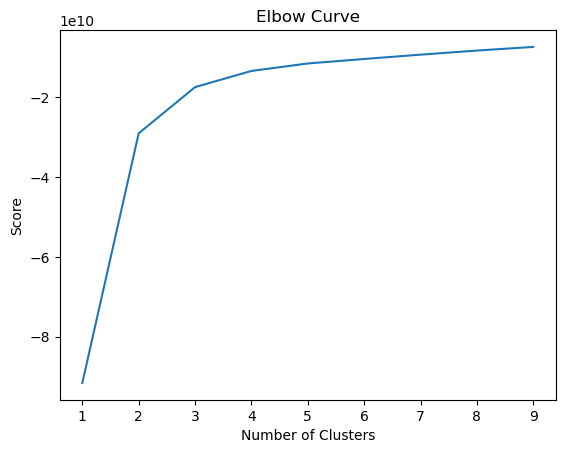

In [24]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The Elbow Curve shows that the score decreases sharply until 3 clusters, after which improvements slow down. Thus, 3 clusters seem optimal.


# k-means clustering

In [30]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [34]:
# Fit the k-means object to the data.
kmeans.fit(df_num)

KMeans(n_clusters=3)

In [44]:
# Assign cluster labels to the dataset based on the fitted k-means model
df['clusters'] = kmeans.fit_predict(df_num)

In [98]:
df.head()

,Unnamed: 0,year,country,region,crop_type,average_temperature_c,total_precipitation_mm,co2_emissions_mt,crop_yield_mt_per_ha,extreme_weather_events,irrigation_access_%,pesticide_use_kg_per_ha,fertilizer_use_kg_per_ha,soil_health_index,adaptation_strategies,economic_impact_million_usd,clusters,cluster
0,0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13,0,pink
1,1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22,0,pink
2,2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96,0,pink
3,3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32,0,pink
4,4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72,0,pink


In [46]:
# Display the number of data points in each cluster
df['clusters'].value_counts()

clusters
1    3348
2    3336
0    3316
Name: count, dtype: int64

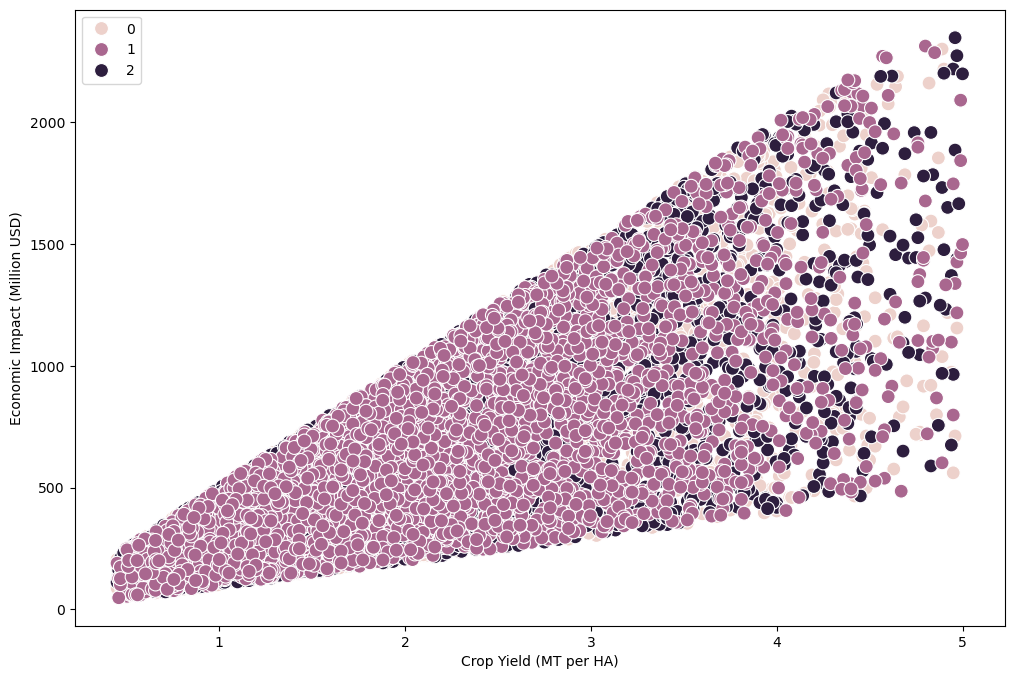

In [50]:
# Plot the clusters for the "economic_impact_million_usd" and "crop_yield_mt_per_ha" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['crop_yield_mt_per_ha'], y=df_num['economic_impact_million_usd'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Crop Yield (MT per HA)')
plt.ylabel('Economic Impact (Million USD)')
plt.show()

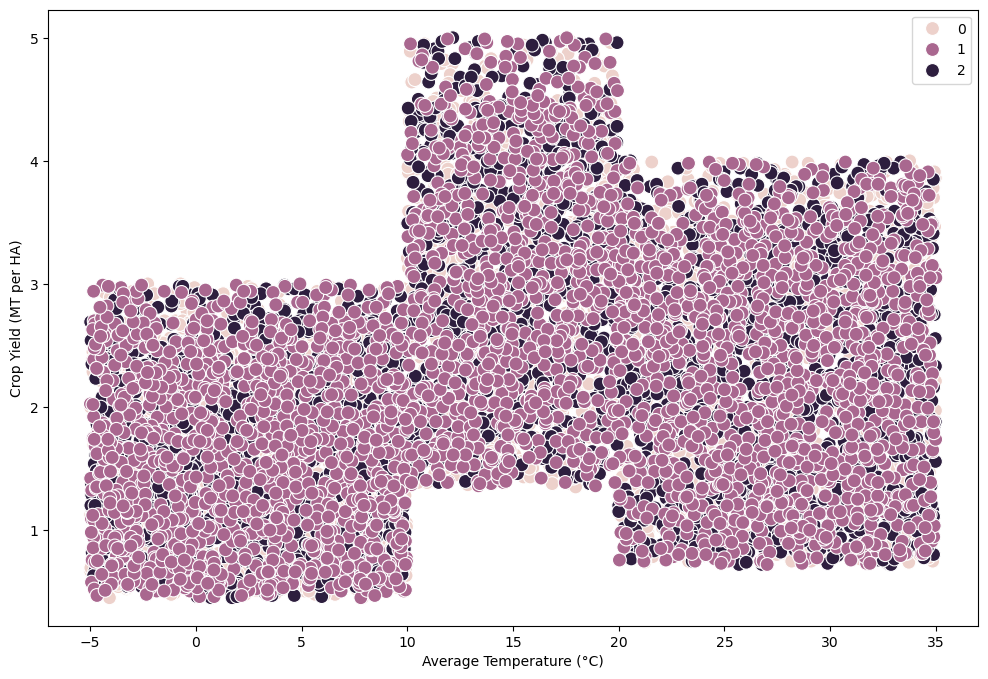

In [56]:
# Plot the clusters for the "crop_yield_mt_per_ha" and "average_temperature_c" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['average_temperature_c'], y=df_num['crop_yield_mt_per_ha'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Crop Yield (MT per HA)')
plt.show()

## Clustering Discussion

### First Plot: Crop Yield vs. Economic Impact
- Observation:
  The clusters are mixed and spread out across the plot. 
  Different colors appear scattered everywhere without clear, compact groupings.
- Interpretation:
  The clustering does not make strong sense here. 
  The model seems to have forced clusters, but the natural data distribution does not show clear separation between groups.
- Why It Doesn't Make Sense:
  Crop yield and economic impact may increase together in general, but not in a way that separates cleanly into clusters. 
  The relationship might be continuous, not discrete, so k-means struggles to form meaningful groups.

### Second Plot: Average Temperature vs. Crop Yield
- Observation:
  The clustering is still unclear here, with blocky and scattered cluster assignments.
- Interpretation:
  The clusters seem to be based on different temperature ranges, but again, not strongly separated by crop yield.
- Why It Doesn't Make Sense:
  Crop yield likely depends on many factors beyond temperature, and temperature alone doesn't create natural groupings in the data.

### Overall
- In both plots, k-means clustering did not create very clear, meaningful groups.
- This suggests that:
  - Either the data does not naturally cluster well with these two features.
  - Or other features (e.g., precipitation) should be included to find better structure.

# Cluster Summary Statistics

In [ ]:
# Assign color labels to each cluster for easier visualization.
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [66]:
df.groupby('cluster').agg({'average_temperature_c':['mean', 'median'], 
                         'crop_yield_mt_per_ha':['mean', 'median'], 
                         'co2_emissions_mt':['mean', 'median'],
                          'economic_impact_million_usd':['mean', 'median']})

average_temperature_c         crop_yield_mt_per_ha          \
                             mean  median                 mean  median   
cluster                                                                  
dark purple             15.505069  15.475             2.255972  2.1885   
pink                    15.057823  14.800             2.245683  2.1500   
purple                  15.160197  15.090             2.218507  2.1600   

            co2_emissions_mt        economic_impact_million_usd           
                        mean median                        mean   median  
cluster                                                                   
dark purple        15.131055  15.24                  679.579877  575.835  
pink               15.240666  15.08                  675.727400  595.585  
purple             15.367631  15.26                  667.534662  578.595

The summary statistics help to understand the typical profile of each cluster.
They can be used to:

- Describe clusters based on temperature, crop yield, CO₂ emissions, and economic impact. For example, we can identify which cluster has the highest crop yield, the lowest CO₂ emissions, or the highest economic impact.

- Create targeted strategies (e.g., improve yield, reduce emissions).

- Use cluster labels as features for future machine learning models.

- Customize recommendations for different groups.

- Check data quality by comparing mean and median values.